Anno 2022/2023

Progetto finale Introduzione alla Data Science

Matricola S5018707

In questo progetto lavorerò su due dataset effettuandone l'integrazione, la rappresentazione, e la predizione di certe statistiche attraverso lo studio

Tipi di dataset:

amazon_titles_1.csv, amazon_titles_2.csv
amazon_credits.csv

disney_titles_1.csv, disney_titles_2.csv
disney_credits.csv

Inizialmente importiamo pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Parto con l'esecuzione della read_csv per creare le tabelle per ogni dataframe

In [2]:
#Amazon

amazon_titles_1 = pd.read_csv("new_data/data/amazon/amazon_titles_1.csv")
amazon_titles_2 = pd.read_csv("new_data/data/amazon/amazon_titles_2.csv")

#Disney

disney_titles_1 = pd.read_csv("new_data/data/disney/disney_titles_1.csv")
disney_titles_2 = pd.read_csv("new_data/data/disney/disney_titles_2.csv")

# Voglio creare un file csv con tutti i titoli di Amazon e Disney



--------------------------------------------------------------------------------------------------------------------------------------
INTEGRAZIONE
--------------------------------------------------------------------------------------------------------------------------------------

###############################################################################################################

Rappresentazione dei dati

Uso questo spazio per visualizzare le informazioni di ogni dataframe in modo da aiutarmi nello studio degli stessi

In [3]:
# Conteggi

# Valori nulli

#print(amazon_titles_1.isnull().sum())
#print(amazon_titles_2.isnull().sum())
#print(disney_titles_1.isnull().sum())
#print(disney_titles_2.isnull().sum())

#print(amazon_titles_combinata['year_added'].isnull().sum())
#print(disney_titles_combinata['year_added'].isnull().sum())

# Valori non nulli

#print(amazon_titles_1.notnull().sum())
#print(amazon_titles_2.notnull().sum())
#print(disney_titles_1.notnull().sum())
#print(disney_titles_2.notnull().sum())

#print(amazon_titles_combinata.notnull().sum())
#print(disney_titles_combinata.notnull().sum())

# Valori duplicati per colonna

#print(amazon_titles_1.duplicated().sum())
#print(amazon_titles_2.duplicated().sum())
#print(disney_titles_1.duplicated().sum())
#print(disney_titles_2.duplicated().sum())

#print(amazon_titles_combinata.duplicated().sum())
#print(disney_titles_combinata.duplicated().sum()) 

# Occorrenze di valori per colonna

#print(amazon_titles_1['type'].value_counts())
#print(amazon_titles_2['type'].value_counts())
#print(disney_titles_1['type'].value_counts())
#print(disney_titles_2['type'].value_counts())

#print(amazon_titles_combinata['age_certification'].value_counts())
#print(disney_titles_combinata['type'].value_counts())


In [4]:
# Dettagli sui dataframe

# Singole colonne

#print(amazon_titles_1['type'])
#print(amazon_titles_2['type'])
#print(disney_titles_1['type'])
#print(disney_titles_2['type'])

#print(amazon_titles_combinata['date_added'])
#print(disney_titles_combinata['type'])

# Prime 5 righe

#print(amazon_titles_1.head())
#print(amazon_titles_2.head())
#print(disney_titles_1.head())
#print(disney_titles_2.head())

#print(amazon_titles_combinata.head())
#print(disney_titles_combinata.head())

# Informazioni generali

#print(amazon_titles_1.info())
#print(amazon_titles_2.info())
#print(disney_titles_1.info())
#print(disney_titles_2.info())

#print(amazon_titles_combinata.info())
#print(disney_titles_combinata.info())

# Descrizione

#print(amazon_titles_1.describe())
#print(amazon_titles_2.describe())
#print(disney_titles_1.describe())
#print(disney_titles_2.describe())

#print(amazon_titles_combinata.describe())
#print(disney_titles_combinata.describe())

# Dimensioni

#print(amazon_titles_1.shape)
#print(amazon_titles_2.shape)
#print(disney_titles_1.shape)
#print(disney_titles_2.shape)

#print(amazon_titles_combinata.shape)
#print(disney_titles_combinata.shape)

# Lista colonne

#print(amazon_titles_1.columns)
#print(amazon_titles_2.columns)
#print(disney_titles_1.columns)
#print(disney_titles_2.columns)

#print(amazon_titles_combinata.columns)
#print(disney_titles_combinata.columns)

###############################################################################################################

Integrazione dei dataframe per ogni piattaforma

In [5]:
# Combino i due dataset usando la concat di pandas

# Per Amazon

amazon_titles_combinata = pd.concat([amazon_titles_1, amazon_titles_2])

# Per Disney

disney_titles_combinata = pd.concat([disney_titles_1, disney_titles_2])



Usando lo spazio apposito per la rappresentazione delle tabelle si nota che ci sono alcune colonne che rappresentano la stessa cosa con nomi diversi:

(country e production_countries, listed_in e genres, id e show_id, runtime e duration)

Quindi procedo con l'unione delle colonne che rappresentano la stessa cosa e la rimozione di quelle inutili

In [6]:
# Modifico le colonne con nomi diversi ma con lo stesso significato usando la funzione fillna di pandas

# (country e production_countries, listed_in e genres, id e show_id, runtime e duration)

# Amazon

amazon_titles_combinata['country'].fillna(amazon_titles_combinata['production_countries'], inplace=True)

amazon_titles_combinata['genres'].fillna(amazon_titles_combinata['listed_in'], inplace=True)

amazon_titles_combinata['id'].fillna(amazon_titles_combinata['show_id'], inplace=True)

amazon_titles_combinata['duration'].fillna(amazon_titles_combinata['runtime'], inplace=True)

# Disney

disney_titles_combinata['country'].fillna(disney_titles_combinata['production_countries'], inplace=True)

disney_titles_combinata['genres'].fillna(disney_titles_combinata['listed_in'], inplace=True)

disney_titles_combinata['id'].fillna(disney_titles_combinata['show_id'], inplace=True)

disney_titles_combinata['duration'].fillna(disney_titles_combinata['runtime'], inplace=True)


# Poi elimino le colonne che non mi servono più

amazon_titles_combinata.drop(['production_countries', 'listed_in', 'show_id', 'runtime'], axis=1, inplace=True)
disney_titles_combinata.drop(['production_countries', 'listed_in', 'show_id', 'runtime'], axis=1, inplace=True)



Dopo l'unione eseguo uno step di pulizia dei dati per eliminare le righe inutili usando lo spazio dedicato alla rappresentazione delle tabelle

Da tale analisi spuntano, per mio giudizio:

Comunemente ai due dataset

Rimuovo:

['seasons','date_added'] perchè hanno troppi valori nulli per renderle utili

['description','imdb_id','cast','director'] dato che non rappresentano materia utile per uno studio

Modifico:

['type'] perchè guardando le occorrenze di valori della colonna si nota che ci sono quattro tipi('TV Show', 'Movie', 'MOVIE', 'SHOW'), ma per quello che indica la colonna è meglio usarne due('MOVIE', 'SHOW')

In [7]:
#Effettuo il drop delle colonne inutili


amazon_titles_combinata.drop(['description', 'imdb_id', 'seasons','cast','director'], axis=1, inplace=True)

disney_titles_combinata.drop(['description', 'imdb_id', 'seasons','cast','director'], axis=1, inplace=True)


# Modifica colonna type per definire i due valori assumibili da essa (MOVIE, SHOW)

amazon_titles_combinata['type'] = amazon_titles_combinata['type'].replace('Movie', 'MOVIE')
amazon_titles_combinata['type'] = amazon_titles_combinata['type'].replace('TV Show', 'SHOW')

disney_titles_combinata['type'] = disney_titles_combinata['type'].replace('Movie', 'MOVIE')
disney_titles_combinata['type'] = disney_titles_combinata['type'].replace('TV Show', 'SHOW')


amazon_titles_combinata.drop_duplicates(subset='id', inplace=True, keep='first')

disney_titles_combinata.drop_duplicates(subset='id', inplace=True, keep='first')


----------------------------------------------------------------------------------------------------------------
TRASFORMAZIONE
----------------------------------------------------------------------------------------------------------------

Purtroppo non capisco se siano realmente utili gli step di trasformazione assegnati dal progetto, penso che non avrebbe senso sostituire la colonna genres, dal momento che è una colonna che indica il genere del film, con una che ne indica solo il numero, sarebbe meglio aggiungerla a parte

Riguardo al creare colonne contenenti l'anno ed il mese di aggiunta, non ne trovo il motivo visto che la colonna contiene una quantità irrisoria di valori, ma una parte del progetto lo richiede quindi procedo

In [8]:
# Attualmente ci sono dei valori nella colonna genres che sono delle strighe, quindi non posso effettuare il conteggio dei valori in essa contenuti

# Quindi devo trasformare le stringhe in liste

amazon_titles_combinata['genres'] = amazon_titles_combinata['genres'].apply(lambda x: x.split(', '))

# Aggiungo colonna che prende i valori della colonna genres e ne conta gli elementi inserendo il risultato in una nuova colonna chiamata genres_count

amazon_titles_combinata['genres_count'] = amazon_titles_combinata['genres'].apply(lambda x: len(x))

# Stessa cosa per Disney

disney_titles_combinata['genres'] = disney_titles_combinata['genres'].apply(lambda x: x.split(', '))

disney_titles_combinata['genres_count'] = disney_titles_combinata['genres'].apply(lambda x: len(x))


# Qua avrei usato la print per controllare la corretta esecuzione del codice, ma basta far riferimento allo spazio dedicato alla visualizzazione dei dati sopra

# Adesso procedo quindi con la creazione di una nuova colonnna che prende il valore della colonna date_added e ne estrae l'anno ed il mese inserendoli in due nuove colonne, ma
# dato che la colonna date_added ha così pochi valori non nulli decido di creare un indice che indichi alle righe che contengono valori non nulli, dato che altrimenti mi riempirebbe le nuove colonne con valori nan

# Amazon

index_notn_amazon = amazon_titles_combinata['date_added'].notnull()

# Disney

index_notn_disney = disney_titles_combinata['date_added'].notnull()

# Formato date_added: gg mm, yyyy

# Amazon

amazon_titles_combinata['year_added'][index_notn_amazon] = amazon_titles_combinata['date_added'][index_notn_amazon].astype(str).str.split(', ').str[-1]
amazon_titles_combinata['month_added'][index_notn_amazon] = amazon_titles_combinata['date_added'][index_notn_amazon].astype(str).str.split(' ').str[0]

# Disney

disney_titles_combinata['year_added'][index_notn_disney] = disney_titles_combinata['date_added'][index_notn_disney].astype(str).str.split(', ').str[-1]
disney_titles_combinata['month_added'][index_notn_disney] = disney_titles_combinata['date_added'][index_notn_disney].astype(str).str.split(' ').str[0]




KeyError: 'year_added'

----------------------------------------------------------------------------------------------------------------
ESPLORAZIONE
----------------------------------------------------------------------------------------------------------------

Durante questo step eseguo qualche rappresentazione grafica per capire meglio i dati che ho a disposizione

Prima: distribuzione dell'imdb_score per age_certification

Seconda: numero di programmi per release_year

Terza: uguale alla seconda ma per date_added

Text(0.5, 0, 'age_certification')

<Figure size 5000x4000 with 0 Axes>

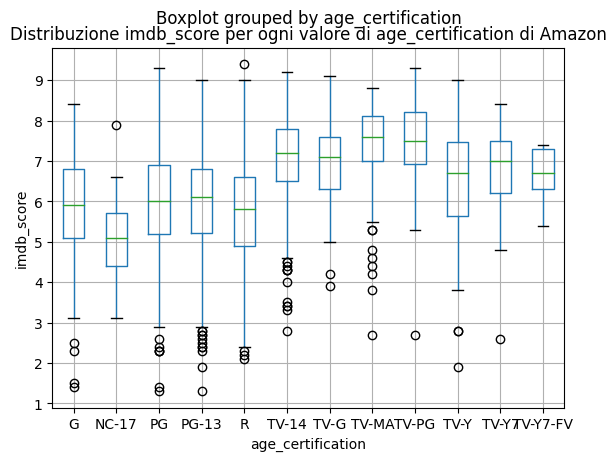

In [ ]:
# PRIMA

# Visualizzo un box pLot con la distribuione dell'imdb_score per ogni valore di age_certification
plt.figure(figsize=(50,40))
amazon_titles_combinata.boxplot(column=['imdb_score'], by=['age_certification'])
plt.title('Distribuzione imdb_score per ogni valore di age_certification di Amazon')
plt.ylabel('imdb_score')
plt.xlabel('age_certification')


Text(0.5, 0, 'age_certification')

<Figure size 5000x4000 with 0 Axes>

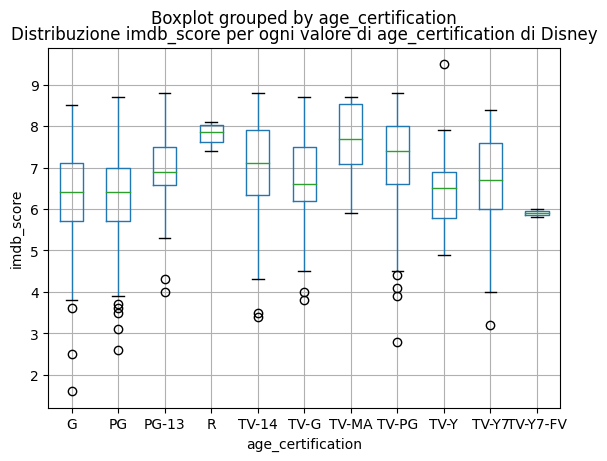

In [ ]:
# PRIMA

# Visualizzo un box pLot con la distribuione dell'imdb_score per ogni valore di age_certification

plt.figure(figsize=(50,40))
disney_titles_combinata.boxplot(column=['imdb_score'], by=['age_certification'])
plt.title('Distribuzione imdb_score per ogni valore di age_certification di Disney')
plt.ylabel('imdb_score')
plt.xlabel('age_certification')

Text(0, 0.5, 'Numero di programmi')

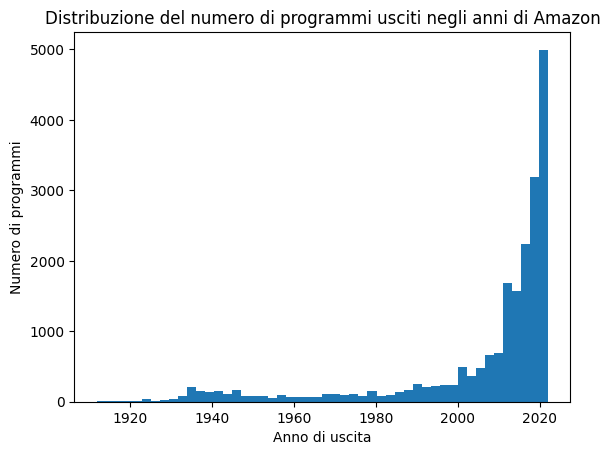

In [ ]:
# SECONDA

# Visualizzo un istogramma per rappresentare il numero di programmi usciti negli anni

plt.figure()
plt.hist(amazon_titles_combinata['release_year'], bins=50)
plt.title('Distribuzione del numero di programmi usciti negli anni di Amazon')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di programmi')


Text(0, 0.5, 'Numero di programmi')

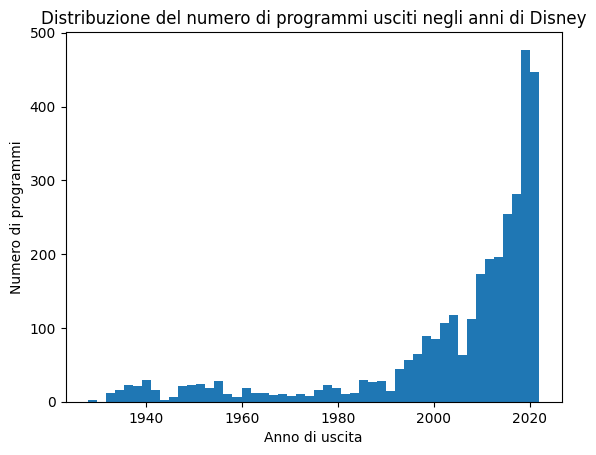

In [ ]:
# SECONDA

# Visualizzo un istogramma per rappresentare il numero di programmi usciti negli anni

plt.figure()
plt.hist(disney_titles_combinata['release_year'], bins=50)
plt.title('Distribuzione del numero di programmi usciti negli anni di Disney')
plt.xlabel('Anno di uscita')
plt.ylabel('Numero di programmi')


In [ ]:
# TERZA
# Dato che si tratta di una colonna con molti valori nulli, inizialmente elimino le righe con valore nan nella colonna year_added

amazon_titles_combinata_aux = amazon_titles_combinata['year_added'].drop_duplicates(keep=False)

# Quindi rappresento con un istogramma il numero di programmi aggiunti negli anni

plt.figure()
plt.hist(amazon_titles_combinata_aux['year_added'], bins=50)
plt.title('Distribuzione del numero di programmi aggiunti negli anni di Amazon')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di programmi')


KeyError: 'year_added'

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Numero di programmi')

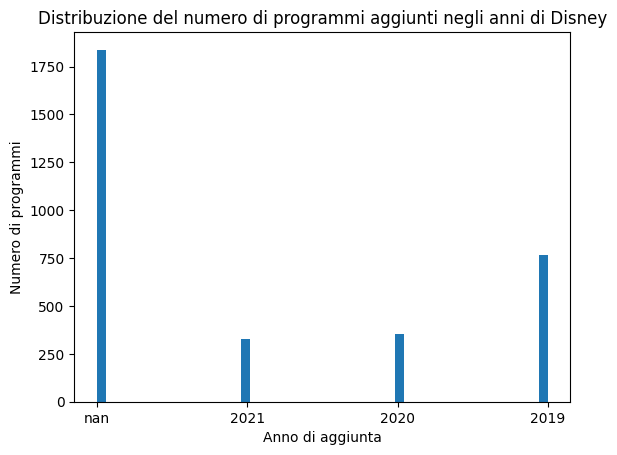

In [ ]:
# TERZA

# Visualizzo un istogramma per rappresentare il numero di programmi aggiunti negli anni senza considerare le righe senza un valore

plt.figure()
plt.hist(disney_titles_combinata['year_added'].dropna(axis=0), bins=50)
plt.title('Distribuzione del numero di programmi aggiunti negli anni di Disney')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di programmi')


----------------------------------------------------------------------------------------------------------------
TEST STATISTICI
----------------------------------------------------------------------------------------------------------------

In questo passaggio del progetto andremo ad effettuare degli studi sui dati per capire il comportamento di alcune colonne dei due dataset

Inizialmente controllerò la distribuzione dei MOVIE per anno di produzione rispetto a quelli di aggiunta

Poi eseguirò lo stesso procedimento sul tipo SHOW

Infine eseguirò il medesimo test sull'intera base di dati effettuando un join naturale tra i due dataset

In [ ]:
# Primo Test
